In [2]:
#Imports
from pandas_datareader.data import DataReader
from datetime import date
from pandas.util.testing import assert_frame_equal

#Define the series code for 10-yr Treasury Rate
series_code = 'DGS10'

#Datasource #FRED Economic Data Service
data_source = 'fred'

c:\users\jjf82\appdata\local\programs\python\python38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
#Set Date
start = date(1962,1,1)

#Create the datareader object
data = DataReader(series_code, data_source, start)

In [4]:
#check, notice that its a datetimeindex
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15333 entries, 1962-01-02 to 2020-10-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DGS10   14679 non-null  float64
dtypes: float64(1)
memory usage: 239.6 KB


In [10]:
#rename the column using pandas rename with a dictionary
series_name = '10-year Treasury yield'
data = data.rename(columns={series_code:series_name})

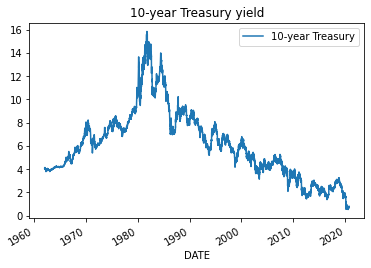

In [11]:
import matplotlib.pyplot as plt
#call the .plot method
data.plot(title=series_name); plt.show()

In [12]:
# The number of rows does not match the number of points.
# view the data

data.describe()

,10-year Treasury
count,14679.000000
mean,6.047699
std,2.941318
min,0.520000
25%,4.000000
50%,5.820000
75%,7.760000
max,15.840000


The data has a positive skew, with a tail on the right

In [9]:
# Drop the missing values and avoiod the creation of a copy
data.dropna(inplace=True)

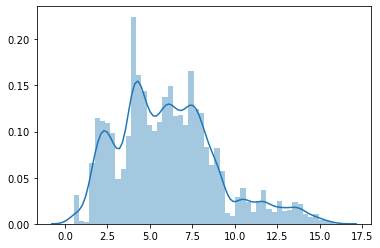

In [13]:
# Review the historical distribution
import seaborn as sns

sns.distplot(data)

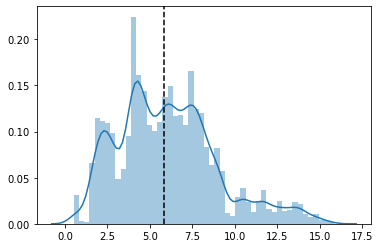

In [18]:
# Improve the display
ax = sns.distplot(data)

ax.axvline(data['10-year Treasury'].median(),color='black', ls='--')